   Home   price  sqft_living  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300         1790         2          2       2    No         East
1     2  114200         2030         4          2       3    No         East
2     3  114800         1740         3          2       1    No         East
3     4   94700         1980         3          2       3    No         East
4     5  119800         2130         3          3       3    No         East
               price  sqft_living
count     128.000000   128.000000
mean   130427.343750  2000.937500
std     26868.770371   211.572431
min     69100.000000  1450.000000
25%    111325.000000  1880.000000
50%    125950.000000  2000.000000
75%    148250.000000  2140.000000
max    211200.000000  2590.000000
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0

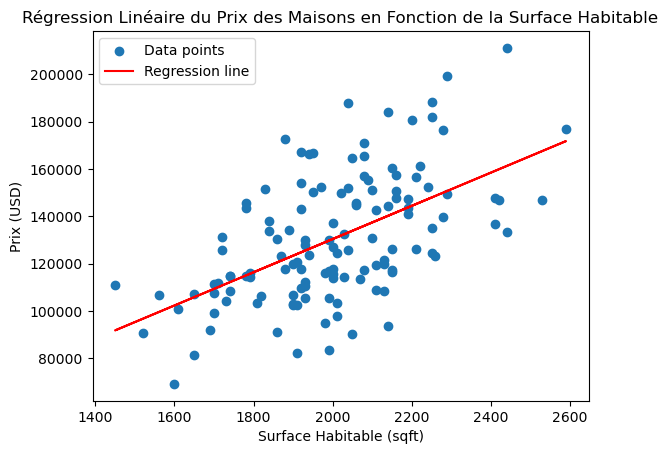

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Charger les données "house_prices"

url = '../Data/house_prices.csv'

data = pd.read_csv(url)

# Exploration des données
print(data.head())
print(data[["price", "sqft_living"]].describe())

# Préparation des données pour la régression
X = data["sqft_living"]
y = data["price"]
X = sm.add_constant(X)  # Ajout d'une constante pour l'ordonnée à l'origine

# Création et ajustement du modèle de régression linéaire
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Affichage des résultats de la régression
print(model.summary())


# Visualisation des résultats
plt.scatter(data["sqft_living"], data["price"], label="Data points")
plt.plot(data["sqft_living"], predictions, color='red', label="Regression line")
plt.xlabel("Surface Habitable (sqft)")
plt.ylabel("Prix (USD)")
plt.title("Régression Linéaire du Prix des Maisons en Fonction de la Surface Habitable")
plt.legend()
plt.show()

In [7]:
p_values = model.pvalues
print("P-values des coefficients :")
print(p_values)

P-values des coefficients :
const          5.956205e-01
sqft_living    1.302383e-11
dtype: float64


In [10]:
# Obtenir les paramètres de la régression
intercept = model.params['const']
slope = model.params['sqft_living']

print(f"Interception (constante): {intercept}")
print(f"Coefficient de la variable indépendante (slope): {slope}")

# Construire l'équation de la droite
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
print(f"Équation de la droite de régression: {equation}")

Interception (constante): -10091.12990912305
Coefficient de la variable indépendante (slope): 70.22631824288521
Équation de la droite de régression: Y = 70.23X + -10091.13


In [11]:
# Obtenir les intervalles de confiance pour les coefficients
confidence_intervals = model.conf_int()
print("Intervalles de confiance pour les coefficients:")
print(confidence_intervals)

Intervalles de confiance pour les coefficients:
                        0             1
const       -47624.492146  27442.232327
sqft_living     51.571612     88.881025


In [13]:
# Extraire les intervalles de confiance pour chaque coefficient
ci_intercept = confidence_intervals.loc['const']
ci_slope = confidence_intervals.loc['sqft_living']

print(f"Intervalle de confiance pour l'interception (constante): [{ci_intercept[0]:.2f}, {ci_intercept[1]:.2f}]")
print(f"Intervalle de confiance pour le coefficient de la variable indépendante (slope): [{ci_slope[0]:.2f}, {ci_slope[1]:.2f}]")

Intervalle de confiance pour l'interception (constante): [-47624.49, 27442.23]
Intervalle de confiance pour le coefficient de la variable indépendante (slope): [51.57, 88.88]
